In [92]:
import glob
import tensorflow as tf
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings(action='once')

In [93]:
def get_section_results(file, tag='Eval_AverageReturn', print_tags=False):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if print_tags:
                print(v.tag)
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
#                 print(1)
            elif v.tag == tag:
                Y.append(v.simple_value)
#                 print(2)
    return X, Y

In [111]:
rootdir = "./cs285/data"
experiments = os.listdir(rootdir)
experiments.sort()
experiments.remove(".DS_Store")
experiments
experiments_q1, experiments_q2, experiments_q3, experiments_q4, experiments_q5 = [], [], [], [], []
for experiment in experiments:
    if experiment[5] == '1':
        experiments_q1.append(experiment)
    elif experiment[5] == '2':
        experiments_q2.append(experiment)
    elif experiment[5] == '3':
        experiments_q3.append(experiment)
    elif experiment[5] == '4':
        experiments_q4.append(experiment)
    elif experiment[5] == '5':
        experiments_q5.append(experiment)

## Question 1

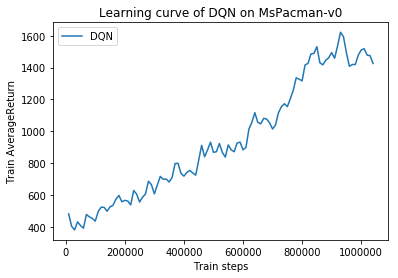

In [96]:
for experiment in experiments_q1:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, tag='Train_AverageReturn')
    plt.plot(X[1:], Y, label="DQN")
    plt.xlabel("Train steps")
    plt.ylabel("Train AverageReturn")
    plt.title("Learning curve of DQN on MsPacman-v0")
    plt.legend()
    plt.show()

## Question 2

[-237.84211222 -185.25255839 -161.78340149 -152.24634806 -142.74855042
 -126.33343506 -114.16877238  -95.08869425  -75.01288223  -56.55817032
  -33.19932032   -8.98141352   17.15541544   36.65561612   53.76859283
   67.36587016   74.74208069   79.45198822   85.10410817   84.21943156
   81.81265004   82.30442683   87.73547999   93.55639394   84.80279032
   74.84436035   79.36658478   88.23241679   71.20681636   61.87516658
   71.88697306   68.05809657   72.2608935    71.41955694   70.35668182
   75.79800924   66.63782883   49.16182868   38.51560465   43.90145938
   54.22845713   50.64102236   52.71013991   66.65624491   57.61300373
   51.37249152   50.80144882   43.22970247   28.47445639]


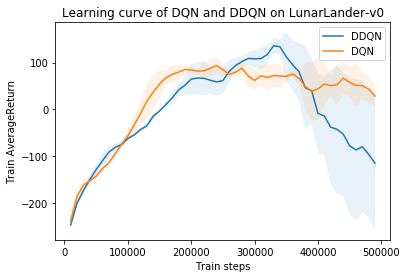

In [97]:
Y_DDQN = []
Y_DQN = []
for experiment in experiments_q2:
    if experiment[7:10] == 'dou':
        label = "DDQN"
    else:
        label = "DQN"
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, tag='Train_AverageReturn')
    if experiment[7:10] == 'dou':
        label = "DDQN"
        Y_DDQN.append(Y)
    else:
        label = "DQN"
        Y_DQN.append(Y)
    
#     plt.plot(X[1:], Y, label=label)
#     plt.xlabel("Train steps")
#     plt.ylabel("Train AverageReturn")
#     plt.title("Learning curve of DQN and DDQN on LunarLander-v0")
    
Y_DDQN = np.array(Y_DDQN)
Y_DQN = np.array(Y_DQN)

Y_DDQN_mean = np.mean(Y_DDQN, axis=0)
Y_DDQN_std = np.std(Y_DDQN, axis=0)
Y_DQN_mean = np.mean(Y_DQN, axis=0)
print(Y_DQN_mean)
Y_DQN_std = np.std(Y_DQN, axis=0)
plt.plot(X[1:], Y_DDQN_mean, label="DDQN")
plt.fill_between(X[1:], (Y_DDQN_mean-Y_DDQN_std), (Y_DDQN_mean+Y_DDQN_std), alpha=.1)
plt.plot(X[1:], Y_DQN_mean, label="DQN")
plt.fill_between(X[1:], (Y_DQN_mean-Y_DQN_std), (Y_DQN_mean+Y_DQN_std), alpha=.1)
plt.xlabel("Train steps")
plt.ylabel("Train AverageReturn")
plt.title("Learning curve of DQN and DDQN on LunarLander-v0")
plt.legend()
plt.show()

## Question 3

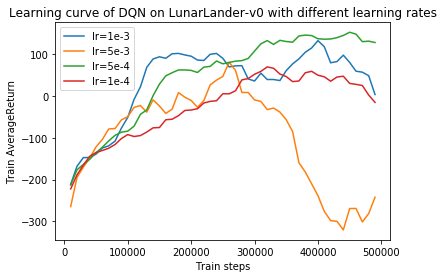

In [59]:
for experiment in experiments_q3:
    if experiment[13] == '0':
        label = "lr=1e-3"
    if experiment[13] == '1':
        label = "lr=5e-3"
    if experiment[13] == '2':
        label = "lr=5e-4"
    if experiment[13] == '3':
        label = "lr=1e-4"
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, tag='Train_AverageReturn')
    
    plt.plot(X[1:], Y, label=label)
    plt.xlabel("Train steps")
    plt.ylabel("Train AverageReturn")
    plt.title("Learning curve of DQN on LunarLander-v0 with different learning rates")
plt.legend()
plt.show()

## Question 4

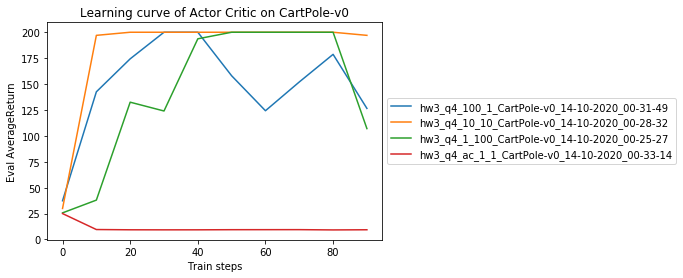

In [100]:
for experiment in experiments_q4:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    _, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
    X = range(0, 100, 10)
    plt.plot(X, Y, label=experiment)
plt.xlabel("Train steps")
plt.ylabel("Eval AverageReturn")
plt.title("Learning curve of Actor Critic on CartPole-v0")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Question 5

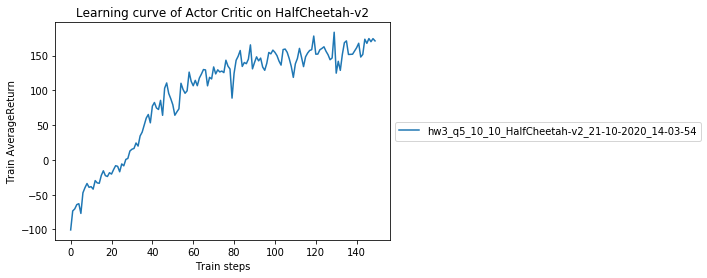

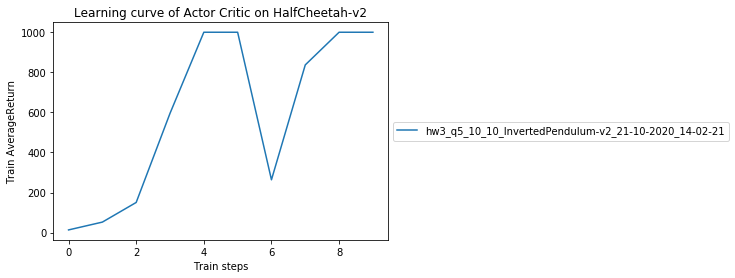

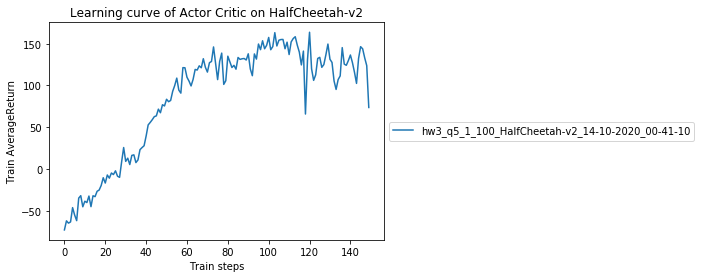

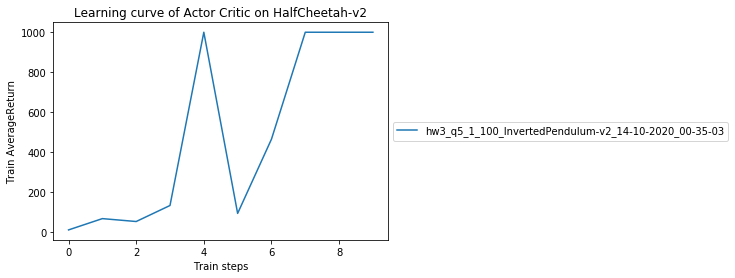

In [112]:
for experiment in experiments_q5:
    logdir = os.path.join(rootdir, experiment, "events*")
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, tag='Eval_AverageReturn', print_tags=False)
    plt.plot(Y, label=experiment)
    plt.xlabel("Train steps")
    plt.ylabel("Train AverageReturn")
    plt.title("Learning curve of Actor Critic on HalfCheetah-v2")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
